In [117]:
import numpy as np
import matplotlib.pyplot as plt
import os
import nibabel as nib
import pandas as pd

In [118]:
%cd /Users/sumeetdash/MAIA/Semester_3/CODES/MISA/Final_Project/MISA-MultiAtlas-Segmentation

/Users/sumeetdash/MAIA/Semester_3/CODES/MISA/Final_Project/MISA-MultiAtlas-Segmentation


In [119]:
from src.utils.helpers import load_nifti, save_nifti, calculate_dice_score
from src.utils.preprocessing import remove_slices, scale_to_8bit, apply_clahe_to_roi
from src.utils.visualzation import analyze_image

In [120]:
data_path = './Data/SPM/Input'
set_name = 'Training_Set'
img_num = 'IBSR_18'

In [121]:
fixed_image_path = os.path.join(data_path, set_name, img_num, f"m{img_num}.nii")
ground_truth_path = os.path.join(data_path, set_name, img_num, f"{img_num}_seg.nii")

In [122]:
fixed_image, fixed_affine = load_nifti(fixed_image_path)
ground_truth, _ = load_nifti(ground_truth_path) if set_name != 'Test_Set' else (None, None)

In [124]:
image_reduced = remove_slices(fixed_image, 0, 32, 32) # remove 32 slices from the top and bottom for x axis
image_reduced = remove_slices(image_reduced, 2, 32, 32) # remove 32 slices from the top and bottom for z axis

ground_truth_reduced = None if ground_truth is None else remove_slices(ground_truth, 0, 32, 32)
ground_truth_reduced = None if ground_truth is None else remove_slices(ground_truth_reduced, 2, 32, 32)

In [125]:
image_scaled = scale_to_8bit(image_reduced)

In [144]:
def process_set(set_name, base_dir, output_dir):
    """
    Processes all images in the specified set and saves the processed images.

    Parameters:
        set_name (str): Name of the set (e.g., 'Training_Set').
        base_dir (str): Base directory containing the image sets.
        output_dir (str): Directory to save processed images.
    """
    input_dir = os.path.join(base_dir, set_name)
    os.makedirs(output_dir, exist_ok=True)

    for folder_name in os.listdir(input_dir):
        if folder_name == ".DS_Store":
            continue  # Skip macOS system files
        
        folder_path = os.path.join(input_dir, folder_name)
        for file_name in os.listdir(folder_path):
            if file_name == ".DS_Store":
                continue  # Skip macOS system files
            if file_name.endswith(".nii") or file_name.endswith(".nii.gz"):
                file_path = os.path.join(folder_path, file_name)
                print(f"Processing: {file_path}")
                
                # Load the image
                img = nib.load(file_path)
                data = img.get_fdata()
                
                # Process the image
                n = 32
                reduced_image = remove_slices(data, 0, n, n)
                reduced_image = remove_slices(reduced_image, 2, n, n)
                if "seg" in file_name:
                    processed_image = reduced_image
                else:
                    processed_image = scale_to_8bit(reduced_image)

                # Save the processed image
                output_folder = os.path.join(output_dir, set_name, folder_name)
                os.makedirs(output_folder, exist_ok=True)
                output_path = os.path.join(output_folder, f"processed_{file_name}")
                
                processed_img = nib.Nifti1Image(processed_image, affine=None)
                nib.save(processed_img, output_path)
                print(f"Saved: {output_path}")

In [128]:
# data_path = './Data/SPM/Input'
# set_name = 'Test_Set'
# # Dynamic folder name
# folder_path = os.path.join(data_path, set_name)
# # Process the folder and get the stats
# stats_df = process_image_folder(folder_path)

# # # Save the stats to a CSV file (optional)
# # output_csv_path = os.path.join(folder_path, "image_stats.csv")
# # stats_df.to_csv(output_csv_path, index=False)

# # Display the stats
# print(stats_df)

In [146]:
# Example usage
base_dir = "./Data/SPM/Input"
output_dir = "/Users/sumeetdash/MAIA/Semester_3/CODES/MISA/Final_Project/MISA-MultiAtlas-Segmentation/Data/SPM/Output"
process_set(set_name="Validation_Set", base_dir=base_dir, output_dir=output_dir)

Processing: ./Data/SPM/Input/Validation_Set/IBSR_17/IBSR_17.nii
Saved: /Users/sumeetdash/MAIA/Semester_3/CODES/MISA/Final_Project/MISA-MultiAtlas-Segmentation/Data/SPM/Output/Validation_Set/IBSR_17/processed_IBSR_17.nii
Processing: ./Data/SPM/Input/Validation_Set/IBSR_17/mIBSR_17.nii
Saved: /Users/sumeetdash/MAIA/Semester_3/CODES/MISA/Final_Project/MISA-MultiAtlas-Segmentation/Data/SPM/Output/Validation_Set/IBSR_17/processed_mIBSR_17.nii
Processing: ./Data/SPM/Input/Validation_Set/IBSR_17/IBSR_17_seg.nii
Saved: /Users/sumeetdash/MAIA/Semester_3/CODES/MISA/Final_Project/MISA-MultiAtlas-Segmentation/Data/SPM/Output/Validation_Set/IBSR_17/processed_IBSR_17_seg.nii
Processing: ./Data/SPM/Input/Validation_Set/IBSR_11/IBSR_11.nii
Saved: /Users/sumeetdash/MAIA/Semester_3/CODES/MISA/Final_Project/MISA-MultiAtlas-Segmentation/Data/SPM/Output/Validation_Set/IBSR_11/processed_IBSR_11.nii
Processing: ./Data/SPM/Input/Validation_Set/IBSR_11/IBSR_11_seg.nii
Saved: /Users/sumeetdash/MAIA/Semester_3/C

In [156]:
path = './Data/SPM/Output/Training_Set/IBSR_03/processed_mIBSR_03.nii'
gt_path = './Data/SPM/Output/Training_Set/IBSR_03/processed_IBSR_03_seg.nii'
fixed_image, fixed_affine = load_nifti(path)
ground_truth, _ = load_nifti(gt_path)

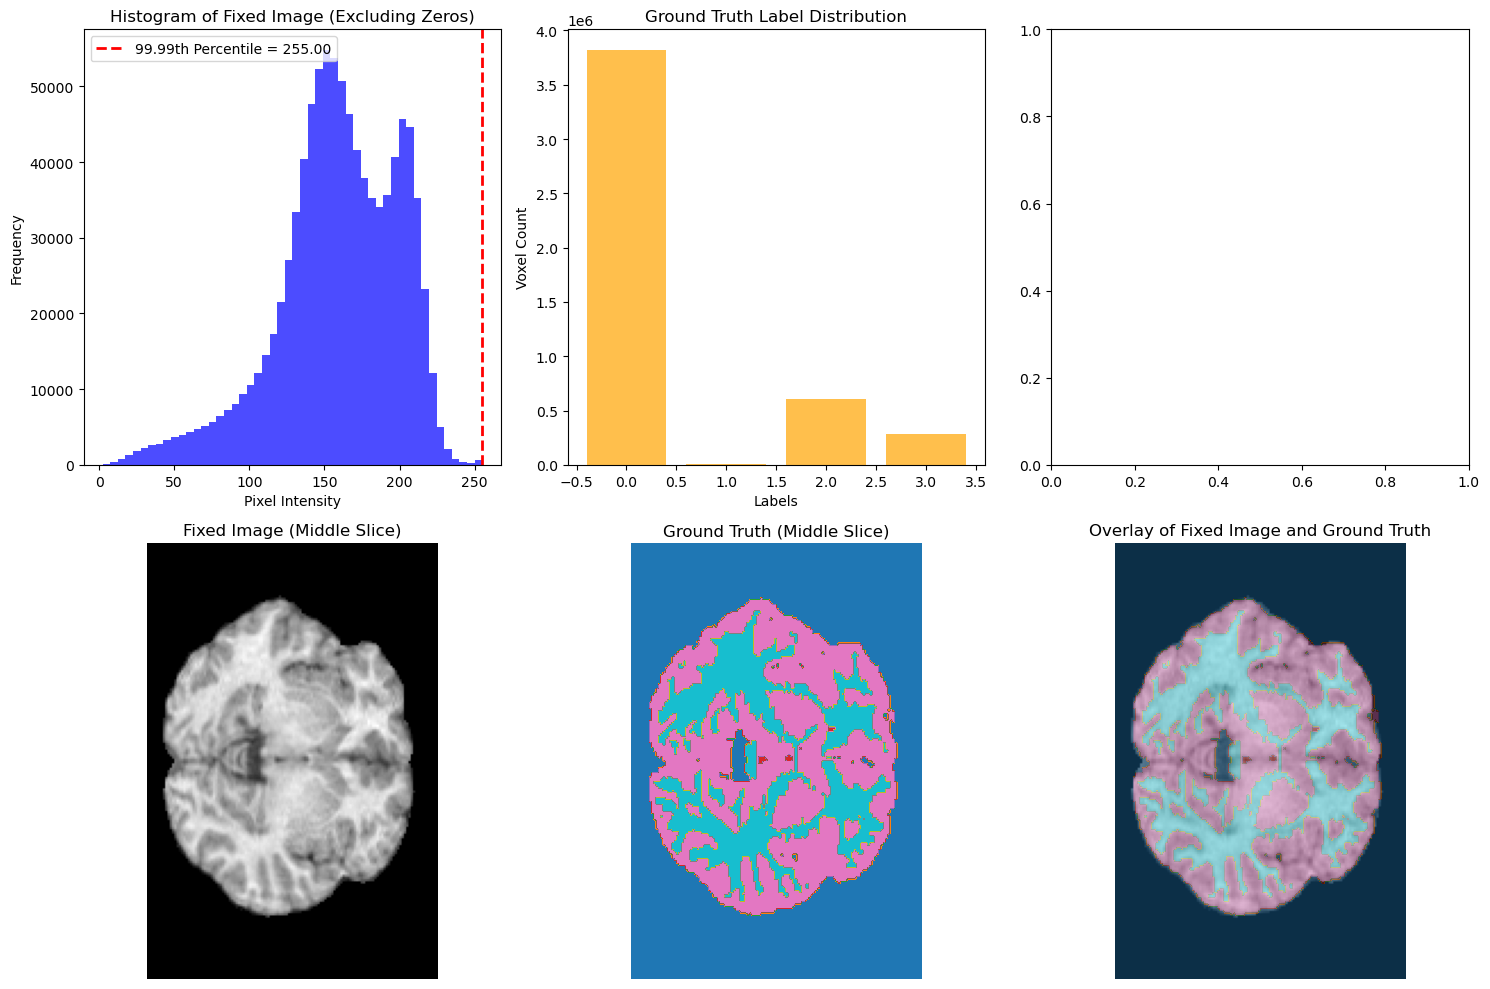

Fixed Image Statistics:
Min: 0.0
Min (Excluding Zeros): 2.3410284923124616
Max: 255.0
Image Type: float64
Intensity Range: (0.0, 255.0)
Voxel Count (Total): 4718592
Voxel Count (Non-Zero): 951358
99.99th Percentile: 254.99845653930453

Ground Truth Label Distribution:
Label 0.0: 3819016
Label 1.0: 6662
Label 2.0: 605843
Label 3.0: 287071


In [157]:
stats = analyze_image(fixed_image, ground_truth = ground_truth)